鐵達尼號乘客生存預測:(

前言

1.匯入資料

In [79]:
import pandas as pd

url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic = pd.read_csv(url)
print(type(titanic))
#titanic = pd.read_csv('file_name')
#titanic
titanic.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.看資料全貌

In [83]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


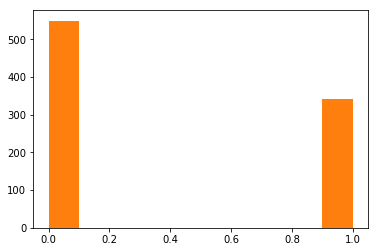

In [30]:
import matplotlib.pyplot as plt

plt.hist(titanic.Survived)
#plt.hist(titanic.Age)
plt.show()

3.填補年齡、登船登船港口空值

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


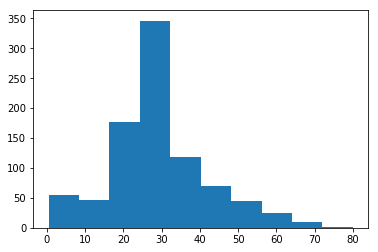

In [94]:
import numpy as np

titanic.Age = titanic.Age.fillna(titanic.Age.mean())
#print(titanic)
print(titanic.Age.head())

plt.hist(titanic.Age)
plt.show()
#titanic.Age = titanic.Age.fillna(o)
#tita_age_med = np.median(titanic.Age)
#tita_age_med

In [86]:
print(titanic.Embarked.value_counts())
titanic.Embarked = np.where(titanic.Embarked.isnull(), "S", titanic.Embarked)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


4.建立dummy variable

In [96]:
from sklearn.preprocessing import LabelEncoder

titanic.Sex = LabelEncoder().fit_transform(titanic.Sex)
print(titanic.Sex.value_counts())
titanic.Embarked = LabelEncoder().fit_transform(titanic.Embarked)
print(titanic.Embarked.value_counts())


1    577
0    314
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64


5.使用羅輯斯回歸模型進行預測

a.建立X,Y

In [104]:
titanic_x = pd.DataFrame([titanic.Pclass, titanic.Sex, titanic.Age, titanic.Fare, titanic.Embarked]).T
print(titanic_x.head())
titanic_y = titanic.Survived
print(titanic_y.head())

   Pclass  Sex   Age     Fare  Embarked
0     3.0  1.0  22.0   7.2500       2.0
1     1.0  0.0  38.0  71.2833       0.0
2     3.0  0.0  26.0   7.9250       2.0
3     1.0  0.0  35.0  53.1000       2.0
4     3.0  1.0  35.0   8.0500       2.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


b.切割訓練與測試資料

In [107]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(titanic_x, titanic_y, test_size = 0.2)
print(train_x.head())

     Pclass  Sex        Age     Fare  Embarked
56      2.0  0.0  21.000000  10.5000       2.0
663     3.0  1.0  36.000000   7.4958       2.0
782     1.0  1.0  29.000000  30.0000       2.0
459     3.0  1.0  29.699118   7.7500       1.0
344     2.0  1.0  36.000000  13.0000       2.0


c.訓練模型-logist regression model

In [119]:
from sklearn import metrics, linear_model

logis_regr = linear_model.LogisticRegression()
#初始化分類器-必要-才能建出模型#
logis_regr.fit(train_x,train_y)
logis_reg_y_pre = logis_regr.predict(test_x)
acc = metrics.accuracy_score(test_y, logis_reg_y_pre)
print(acc)

0.798882681564


d.預測資料

d.1看資料

In [121]:
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_test.csv"
titanic_1 = pd.read_csv(url)
titanic_1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

d.2填補空值

In [128]:
titanic_1.Age = titanic.Age.fillna(titanic.Age.mean())
print(titanic.Fare.value_counts().head())
titanic_1.Fare = titanic.Fare.fillna(8.0500)
titanic_1.isnull().sum()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

d.3建立dummy variable

In [131]:
titanic_1.Sex = LabelEncoder().fit_transform(titanic_1.Sex)
titanic_1.Embarked = LabelEncoder().fit_transform(titanic_1.Embarked)

d.4 模型建立與預測

In [143]:
titanic_1_x = pd.DataFrame([titanic_1.Pclass, titanic_1.Sex, titanic_1.Age, titanic_1.Fare, titanic_1.Embarked]).T
print(titanic_x.head())
logis_reg_y_1_pre = logis_regr.predict(titanic_1_x)
#print(logis_reg_y_1_pre)
type(logis_reg_y_1_pre)
res_dict = {
    "Pass_ID"  : titanic_1.PassengerId,
    "survived" : logis_reg_y_1_pre
}

sad_res = pd.DataFrame(res_dict)
sad_res.head()

   Pclass  Sex   Age     Fare  Embarked
0     3.0  1.0  22.0   7.2500       2.0
1     1.0  0.0  38.0  71.2833       0.0
2     3.0  0.0  26.0   7.9250       2.0
3     1.0  0.0  35.0  53.1000       2.0
4     3.0  1.0  35.0   8.0500       2.0


,Pass_ID,survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


d.5 預測匯出

In [145]:
sad_res.to_csv("sad_res.csv")

6.使用SVM模型

In [148]:
from sklearn import svm

svc = svm.SVC()
tita_svc_tra = svc.fit(titanic_x, titanc_y)
tita_svc_pre = svc.predict(test_x)

acc = metrics.accuracy_score(test_y, tita_svc_pre)
print(acc)

0.916201117318
